In [ ]:
! pip install pandas-profiling

In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import pandas_profiling as pp

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


df =  pd.read_excel("Data.xlsx")
df.info()
profile_report = pp.ProfileReport(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl. No.   437 non-null    int64  
 1   NT        437 non-null    int64  
 2   THT       437 non-null    int64  
 3   THt       437 non-null    int64  
 4   THQCr     437 non-null    int64  
 5   CT        437 non-null    int64  
 6   Ct        437 non-null    float64
 7   DT        437 non-null    float64
 8   Dt        437 non-null    float64
 9   QmT       437 non-null    int64  
 10  TT        437 non-null    int64  
 11  Tt        437 non-null    int64  
 12  TCr       437 non-null    float64
 13  C         437 non-null    float64
 14  Si        437 non-null    float64
 15  Mn        437 non-null    float64
 16  P         437 non-null    float64
 17  S         437 non-null    float64
 18  Ni        437 non-null    float64
 19  Cr        437 non-null    float64
 20  Cu        437 non-null    float6

In [8]:
profile_report = pp.ProfileReport(df)
profile_report


Output hidden; open in https://colab.research.google.com to view.

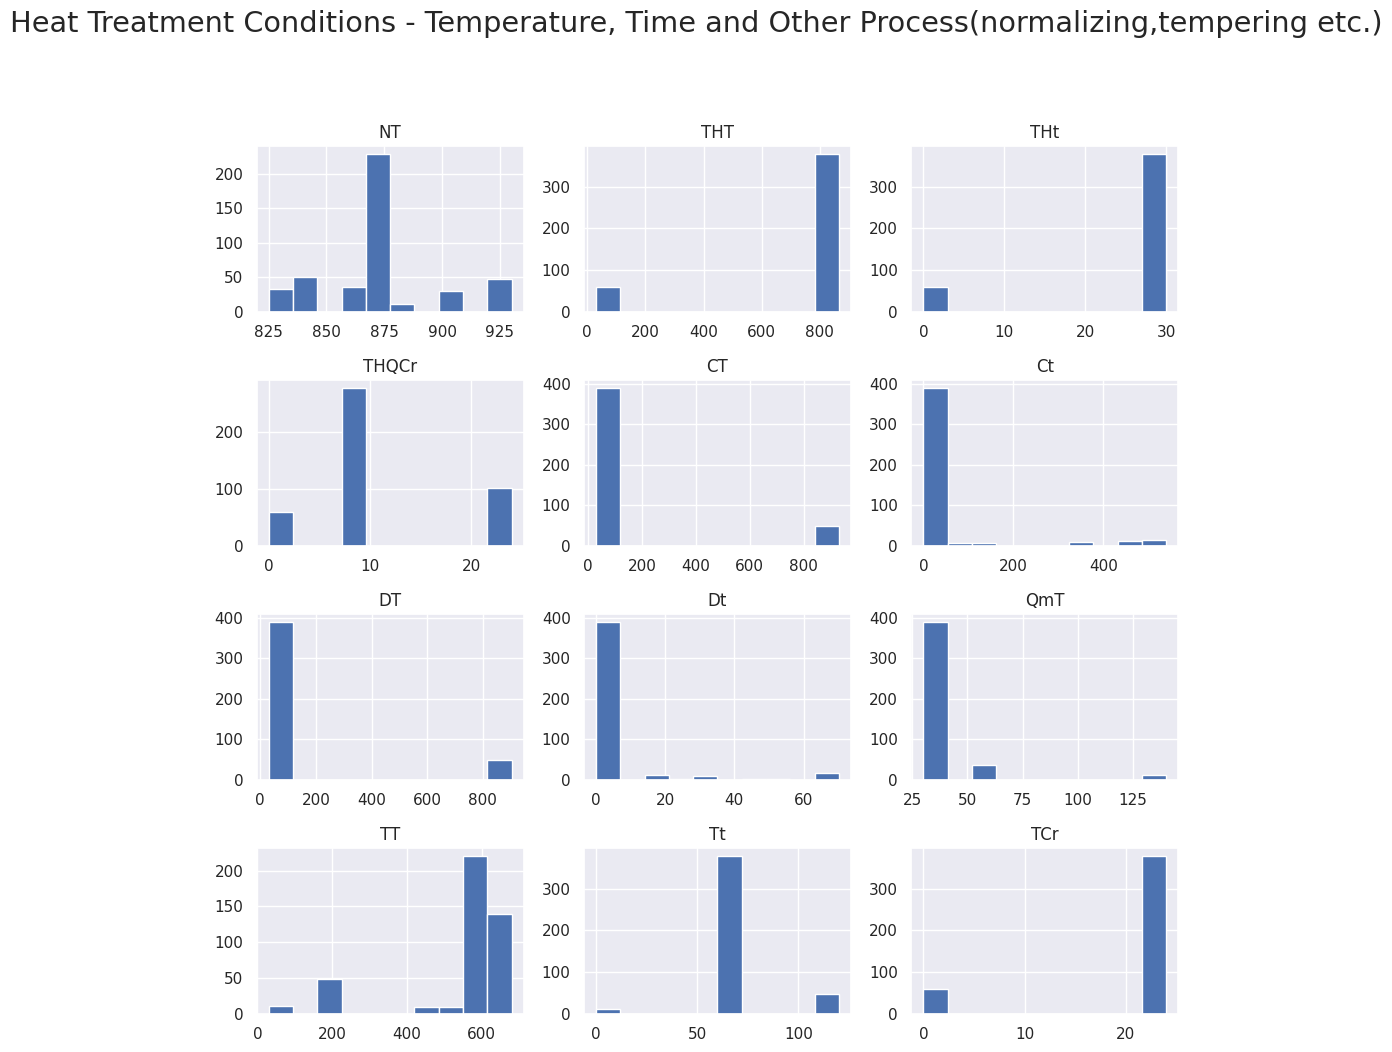

In [10]:
df_1 = df[["C", "Si", "Mn", "P", "S", "Ni", "Cu", "Cr", "Mo"]]
df_2 = df[['NT', 'THT', 'THt', 'THQCr', 'CT', 'Ct', 'DT', 'Dt', 'QmT',
       'TT', 'Tt', 'TCr']]
sns.set(font_scale = 1)
df_2.hist(figsize=(10, 10));
plt.suptitle("Heat Treatment Conditions - Temperature, Time and Other Process(normalizing,tempering etc.)",
             x=0.5, y=1.05, ha='center', fontsize='xx-large');
plt.tight_layout();

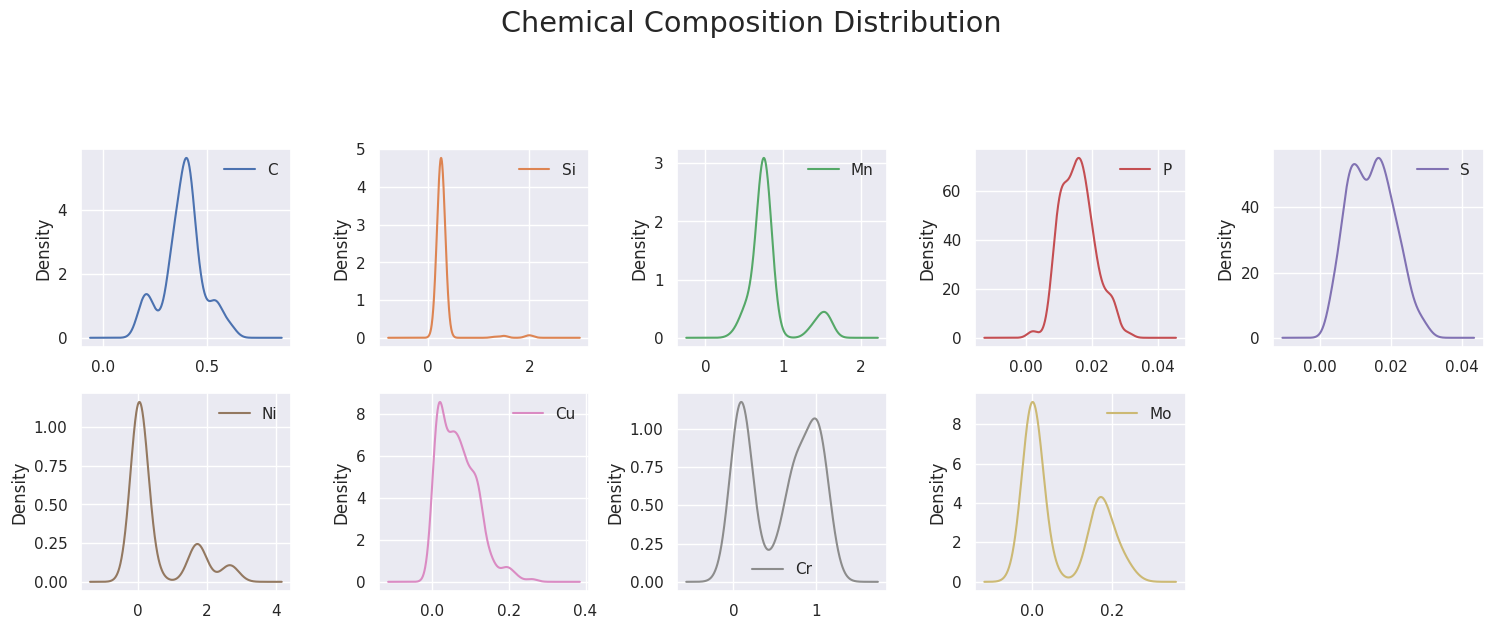

In [12]:
df_1.plot(kind="density", layout=(6,5),subplots=True,sharex=False, sharey=False, figsize=(15,15));
plt.suptitle("Chemical Composition Distribution",
             x=0.5, y=1.05, ha='center', fontsize='xx-large');
plt.tight_layout()

Verified R2 value for Training model: 0.9570361086003383
Verified R2 value for Testing Model: 0.9533822790773965
train cross val rmse:34.801614607625865
test cross val rmse:36.14313945754232


,R^2 Score,Rmse Score
0,0.93,0.39


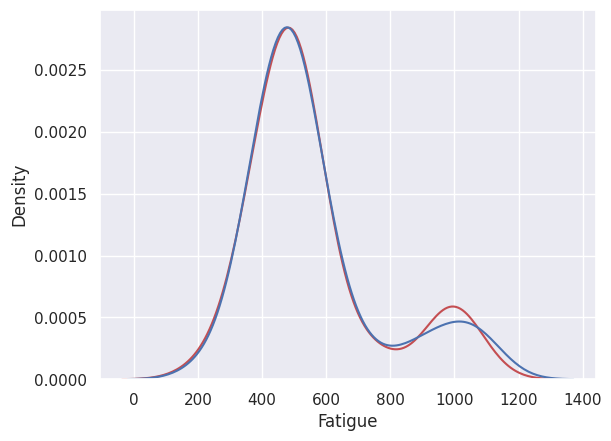

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#df.drop(columns=['Sl. No.'], inplace = True)
X = df.drop(["Fatigue"], axis = 1)
y = df["Fatigue"]
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)
lm = LinearRegression()
lr_model = lm.fit(X_train, y_train)
cross_val_score1=cross_val_score(lr_model, X_train, y_train, cv=10, scoring='r2').mean() #verified score value for train model
print('Verified R2 value for Training model: ' + str(cross_val_score1))

cross_val_score2=cross_val_score(lr_model, X_test, y_test, cv=10, scoring='r2').mean() #verified score value for test model
print('Verified R2 value for Testing Model: ' + str(cross_val_score2))
train_crs_val = np.sqrt(-cross_val_score(lr_model,
                X_train,
                y_train,
                cv = 10,
                scoring = "neg_mean_squared_error")).mean()

test_crs_val = np.sqrt(-cross_val_score(lr_model,
                X_test,
                y_test,
                cv = 10,
                scoring = "neg_mean_squared_error")).mean()

print("train cross val rmse:{}\ntest cross val rmse:{}".format(train_crs_val,test_crs_val))
ax1 = sns.distplot(lr_model.predict(X_test), hist=False, color="r", label="Predict Values")
sns.distplot(y_test, hist=False, color="b", label="Actual Values" , ax=ax1);
d = {'R^2 Score ': [0.93], 'Rmse Score': [0.39]}
lr_data = pd.DataFrame(data=d)
lr_data

R^2 values:0.9475059448217237
rmse: 46.586951938381745
R^2 values:0.9633210042755005
rmse: 38.941973148869494


,R^2 Score,Rmse Score
0,0.91,0.57


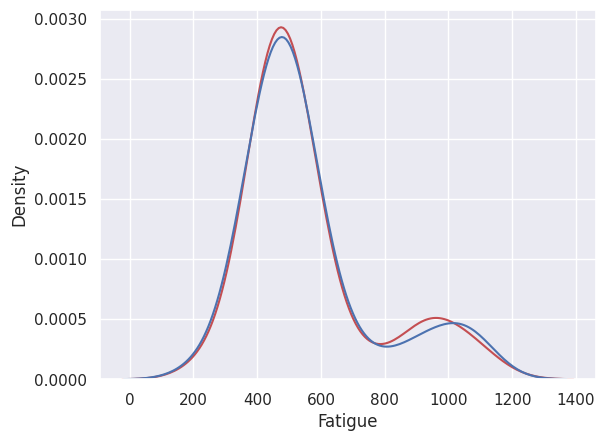

In [15]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor().fit(X_train, y_train)
print("R^2 values:{}".format(knn_model.score(X_test, y_test)))
y_pred = knn_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("rmse: {}".format(rmse))
# Model Tuning
k = {'n_neighbors': np.arange(1,30,1)}
knn_model = KNeighborsRegressor()
cv_model = GridSearchCV(knn_model, k, cv = 10)
cv_model.fit(X_train, y_train)
cv_model.best_params_["n_neighbors"]
knn_model_tuned = KNeighborsRegressor(n_neighbors = cv_model.best_params_["n_neighbors"])
knn_model_tuned.fit(X_train, y_train)
print("R^2 values:{}".format(knn_model_tuned.score(X_test, y_test)))
y_pred = knn_model_tuned.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("rmse: {}".format(rmse))
ax1 = sns.distplot(knn_model_tuned.predict(X_test), hist=False, color="r", label="Predict Values")
sns.distplot(y_test, hist=False, color="b", label="Actual Values" , ax=ax1);
d = {'R^2 Score ': [0.91], 'Rmse Score': [0.57]}
knn_data = pd.DataFrame(data=d)
knn_data

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)
y_pred = gbm_model.predict(X_test)

print("R^2 values:{}".format(gbm_model.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("rmse: {}".format(rmse))
#model tuning

gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)
gbm_cv_model.best_params_
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.2,
                                       max_depth = 3,
                                      n_estimators = 200,
                                      subsample = 0.75)
gbm_tuned = gbm_tuned.fit(X_train,y_train)

y_pred = gbm_tuned.predict(X_test)

print("R^2 values:{}".format(gbm_tuned.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("rmse: {}".format(rmse))
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind ="barh", color = "r");

plt.xlabel("Variable Significance Levels");
ax1 = sns.distplot(gbm_tuned.predict(X_test), hist=False, color="r", label="Predict Values")
sns.distplot(y_test, hist=False, color="b", label="Actual Values" , ax=ax1);
d = {'R^2 Score ': [0.98], 'Rmse Score': [0.23]}
gbm_data = pd.DataFrame(data=d)
gbm_data

R^2 values:0.9740404643045855
rmse: 32.761041146350934
Fitting 10 folds for each of 240 candidates, totalling 2400 fits
